<a href="https://colab.research.google.com/github/Azimoj/CNN/blob/main/W10_Building_a_VGG16_CNN_network_%5BCorrection%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

# Tasks
In this quest, you will be working on a classic CNN task of classifying cats and dogs images. You can access the training and testing sets [here](https://drive.google.com/drive/folders/19EL9VyYCVqxStG-O1jJtBQGa8JZpLDvO?usp=sharing) and get acquainted with the folder structure.

Make sure to change your Colab runtime to GPU to ensure adequate performance.

Copy the train set and testing set in your drive folder and use this code to get access to your drive in colab :

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Use `image_dataset_from_directory` (check the [documentation](https://keras.io/api/preprocessing/image/)) to load the data. To preprocess the images, you might use `tf.keras.applications.vgg16.preprocess_input`

In [ ]:
path_to_dir = r"/content/drive/MyDrive/Cours/W10 - CNN/classification_exo" # à remplacer avec son propre chemin

test_set = tf.keras.utils.image_dataset_from_directory(
    directory=os.path.join(path_to_dir, 'test_set'),
    image_size=(224, 224)
    )

train_set = tf.keras.utils.image_dataset_from_directory(
    directory=os.path.join(path_to_dir, 'training_set'),
    image_size=(224, 224)
    )

Found 2000 files belonging to 2 classes.
Found 8000 files belonging to 2 classes.


In [ ]:
class_names = test_set.class_names
print(class_names)

['cats', 'dogs']


In [ ]:
for image_batch, labels_batch in train_set.take(1):
  print(image_batch[0].shape)
  print(np.max(image_batch[0]), np.min(image_batch[0]))
  print(labels_batch[0])
  break

(224, 224, 3)
255.0 9.7630825
tf.Tensor(0, shape=(), dtype=int32)


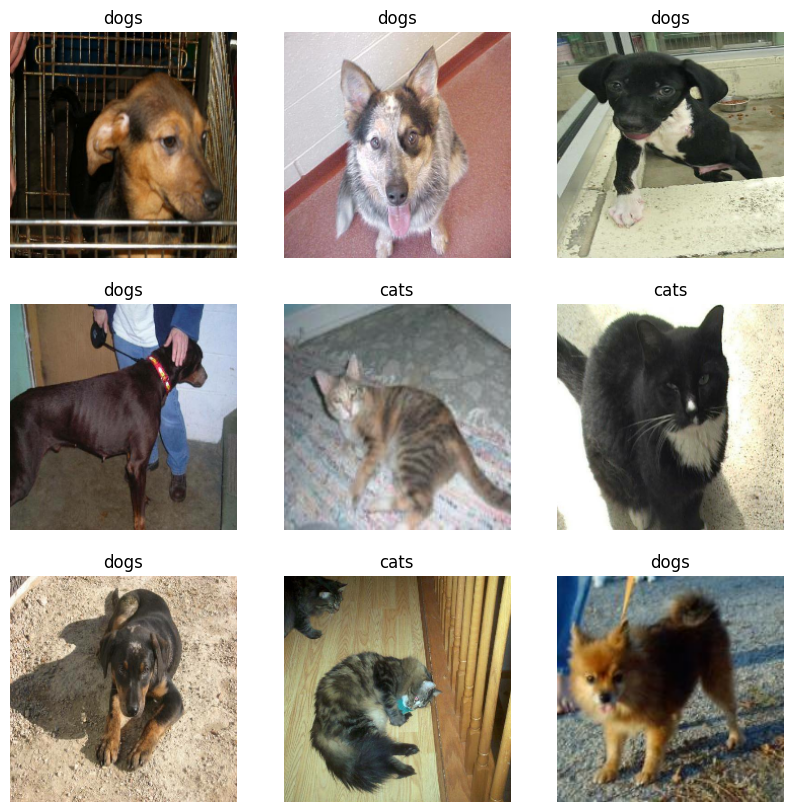

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_set.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

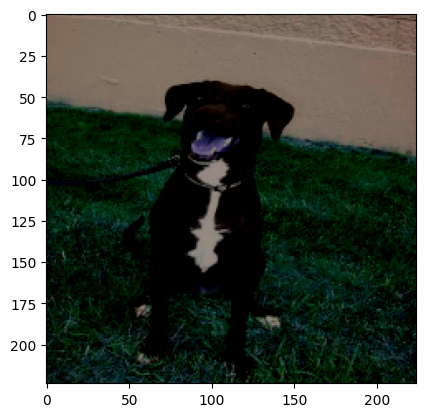

In [ ]:
def display(ds):
  images, _ = next(iter(ds.take(1)))
  image = images[0].numpy()
  image /= 255.0
  plt.imshow(image)

def preprocess(images, labels):
  return tf.keras.applications.vgg16.preprocess_input(images), labels

train_set = train_set.map(preprocess)
test_set = test_set.map(preprocess)

display(train_set)

In [ ]:
for image_batch, labels_batch in train_set.take(1):
  print(image_batch[0].shape)
  print(np.max(image_batch[0]), np.min(image_batch[0]))
  print(labels_batch[0])
  break

(224, 224, 3)
151.01706 -122.05078
tf.Tensor(0, shape=(), dtype=int32)


Build a convolutional neural network based on the [VGG16](https://neurohive.io/en/popular-networks/vgg16/) architecture.

In [ ]:
VGG16_model = tf.keras.applications.VGG16(weights=None, classes=1, classifier_activation='sigmoid')

Compile it using the optimizer and error metrics of your choice.

In [ ]:
#optimizer = tf.keras.optimizers.Adam(learning_rate=1e-7) -> pas forcément le meilleur pour VGG16
optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-6)

VGG16_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
VGG16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Fit the model using `.fit`. This time, feel free to define the parameters according to your understanding and experiment with them to find a better solution. Be patient though, the training will take a while.

In [ ]:
history = VGG16_model.fit(train_set,
                    epochs=5,
                    validation_data=test_set
)

Epoch 1/5
250/250 [==============================] - 130s 506ms/step - loss: 0.6812 - accuracy: 0.5648 - val_loss: 0.6653 - val_accuracy: 0.6335
Epoch 2/5
250/250 [==============================] - 128s 510ms/step - loss: 0.6540 - accuracy: 0.6246 - val_loss: 0.6431 - val_accuracy: 0.6325
Epoch 3/5
250/250 [==============================] - 118s 468ms/step - loss: 0.6325 - accuracy: 0.6420 - val_loss: 0.6273 - val_accuracy: 0.6595
Epoch 4/5
250/250 [==============================] - 119s 472ms/step - loss: 0.6208 - accuracy: 0.6520 - val_loss: 0.6199 - val_accuracy: 0.6675
Epoch 5/5
250/250 [==============================] - 120s 476ms/step - loss: 0.6108 - accuracy: 0.6650 - val_loss: 0.6167 - val_accuracy: 0.6485


Plot the model accuracy.

### Evaluation

In [ ]:
# Plotting the model performance during the training phase
def plot_accuracy_loss(history):
    fig = plt.figure(figsize=(10,5))

    # Plot ting the accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'], 'bo--', label = 'acc')
    plt.plot(history.history['val_accuracy'], 'ro--', label = 'val_acc')
    plt.title('train_acc VS val_acc')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend()

    # Plotting loss function
    plt.subplot(222)
    plt.plot(history.history['loss'], 'bo--', label = 'loss')
    plt.plot(history.history['val_loss'], 'ro--', label = 'val_loss')
    plt.title('train_loss VS val_loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')

    plt.legend()

    plt.show()

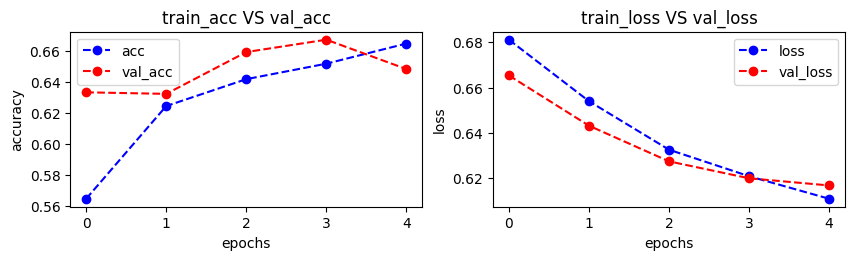

In [ ]:
plot_accuracy_loss(history)

Pour un batch :

In [ ]:
for batch_image, batch_label in test_set.take(1):
  print(batch_image.shape)
  print(batch_label.shape)
  test_loss = VGG16_model.evaluate(batch_image, batch_label)

(32, 224, 224, 3)
(32,)
1/1 [==============================] - 0s 229ms/step - loss: 0.5813 - accuracy: 0.7500


Pour l'intégralité du jeu de test :

In [ ]:
test_acc = []

for batch_image, batch_label in test_set:
  test_acc.append((VGG16_model.evaluate(batch_image, batch_label, verbose=0))[1])

In [ ]:
len(test_acc) * 32

2016

In [ ]:
final_accuracy = np.mean(test_acc)
print(f"Accuracy moyenne :{final_accuracy:.1%}")

Accuracy moyenne :65.0%


### Classification report

In [ ]:
total_pred_labels = []
total_batch_labels = []

for batch_image, batch_label in test_set:
  predictions = VGG16_model.predict(batch_image, verbose=0)
  pred_labels = [1 if x > 0.5 else 0 for x in predictions] #Transforme la proba en prédiction

  total_pred_labels.extend(pred_labels)
  total_batch_labels.extend(batch_label.numpy().tolist())


print(total_pred_labels)
print(total_batch_labels)

[0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 

In [ ]:
total_batch_labels = np.array(total_batch_labels).reshape(-1, 1)
total_pred_labels = np.array(total_pred_labels).reshape(-1, 1)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(total_batch_labels, total_pred_labels))

              precision    recall  f1-score   support

           0       0.72      0.49      0.58      1000
           1       0.61      0.81      0.70      1000

    accuracy                           0.65      2000
   macro avg       0.67      0.65      0.64      2000
weighted avg       0.67      0.65      0.64      2000



0 = Chat, 1 = Chien

### Continuer l'entrainement

In [ ]:
VGG16_model = tf.keras.applications.VGG16(weights=None, classes=1, classifier_activation='sigmoid')

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model_checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True, monitor='val_loss', mode='min', verbose=1)
early_stopping = EarlyStopping(monitor="val_loss", patience=6)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-6)
#optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-6)

VGG16_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = VGG16_model.fit(train_set,
                    epochs=100,
                    validation_data=test_set,
                    callbacks=[model_checkpoint, early_stopping]
)

Epoch 1/100
250/250 [==============================] - ETA: 0s - loss: 0.6715 - accuracy: 0.5893
Epoch 1: val_loss improved from inf to 0.64741, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


250/250 [==============================] - 190s 744ms/step - loss: 0.6715 - accuracy: 0.5893 - val_loss: 0.6474 - val_accuracy: 0.6415
Epoch 2/100
250/250 [==============================] - ETA: 0s - loss: 0.6262 - accuracy: 0.6541
Epoch 2: val_loss did not improve from 0.64741
250/250 [==============================] - 133s 529ms/step - loss: 0.6262 - accuracy: 0.6541 - val_loss: 0.6476 - val_accuracy: 0.6035
Epoch 3/100
250/250 [==============================] - ETA: 0s - loss: 0.6023 - accuracy: 0.6750
Epoch 3: val_loss improved from 0.64741 to 0.60654, saving model to best_model.h5
250/250 [==============================] - 191s 764ms/step - loss: 0.6023 - accuracy: 0.6750 - val_loss: 0.6065 - val_accuracy: 0.6645
Epoch 4/100
250/250 [==============================] - ETA: 0s - loss: 0.5866 - accuracy: 0.6864
Epoch 4: val_loss improved from 0.60654 to 0.58871, saving model to best_model.h5
250/250 [==============================] - 182s 724ms/step - loss: 0.5866 - accuracy: 0.6864 

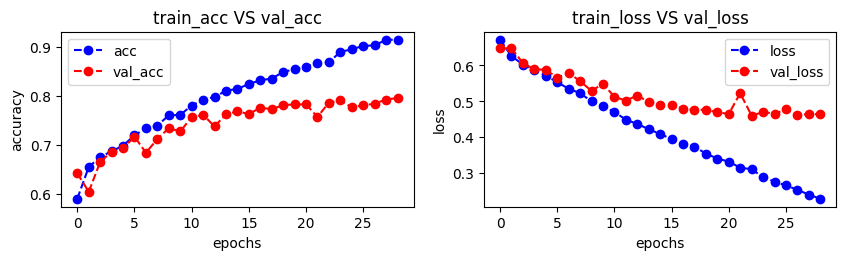

In [ ]:
plot_accuracy_loss(history)

In [ ]:
total_pred_labels = []
total_batch_labels = []

for batch_image, batch_label in test_set:
  predictions = VGG16_model.predict(batch_image, verbose=0)
  pred_labels = [1 if x > 0.5 else 0 for x in predictions] #Transforme la proba en prédiction

  total_pred_labels.extend(pred_labels)
  total_batch_labels.extend(batch_label.numpy().tolist())

total_batch_labels = np.array(total_batch_labels).reshape(-1, 1)
total_pred_labels = np.array(total_pred_labels).reshape(-1, 1)

print(classification_report(total_batch_labels, total_pred_labels))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80      1000
           1       0.83      0.75      0.79      1000

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.80      0.80      0.80      2000

